In [1]:
# Import required libraries
import yfinance as yf

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# build a portfolio. You can pick any stocks you want.

# Create a list of symbols for portfolio
# For this example however I will just use the FAANG stocks.

symbols = ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']



# Get data using the yahoo Finance API
data = yf.download(symbols, start="2020-01-01", end="2022-11-30")

# using the Adjusted close price, use the built in .pct_change function to assess the portfolios returns
portfolio_returns = data['Adj Close'].pct_change().dropna()

[*********************100%***********************]  5 of 5 completed


### PCA model

In [3]:
# fit a PCA model and get the components.

# Build a PCA Model
# The n_components argument tells sklearn how many of the top components to return
pca = PCA(n_components=3)

# Fit the model with the portfolio returns
pca.fit(portfolio_returns)

PCA(n_components=3)

In [4]:
# grab the explained variance and components
pct = pca.explained_variance_ratio_
pca_components = pca.components_

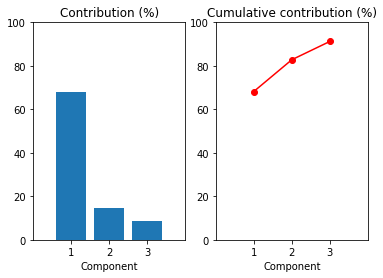

In [5]:
# Visualize the components
# If the description of PCA is unclear, these charts should help.

cum_pct = np.cumsum(pct)
x = np.arange(1,len(pct)+1,1)

plt.subplot(1, 2, 1)
plt.bar(x, pct * 100, align="center")
plt.title('Contribution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.plot(x, cum_pct * 100, 'ro-')
plt.title('Cumulative contribution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])


# Save the figure.
plt.savefig("./Images/FAANGStocksContribution_CumulativeContribution.jpg")

**The chart on the left** shows the contribution of the top three components toward the total variance. In other words, these components contribute the most to the information in the data. The first component explains 54.9% of the variation in the portfolio returns. In stock portfolios, this is usually driven by the overall market movement.

**The chart on the right** is the cumulative sum of the contribution of each component. It shows the top three components explain 84.7% of total portfolio returns. There’s no magic cumulative contribution but two or three components explaining close to 85% of the contribution is a good result.

In [6]:
# Isolate the alpha factors

X = np.asarray(portfolio_returns)

# muliply the portfolio returns by the principle components. 
# The dot function makes sure every return is multiplied by each of the components
# the T function transposes the DataFrame. 

factor_returns = X.dot(pca_components.T)

# how much of that day’s portfolio return is a result of each of the three factors.
factor_returns = pd.DataFrame(
    columns=["f1", "f2", "f3"], 
    index=portfolio_returns.index,
    data=factor_returns
)

factor_returns.head()

,f1,f2,f3
Date,,,
2020-01-03,0.019482,0.002685,-0.006330
2020-01-06,-0.044082,-0.007813,-0.000849
2020-01-07,0.007975,0.011897,-0.001586
2020-01-08,-0.024595,-0.011074,-0.004951
2020-01-09,-0.015815,0.023949,0.003546


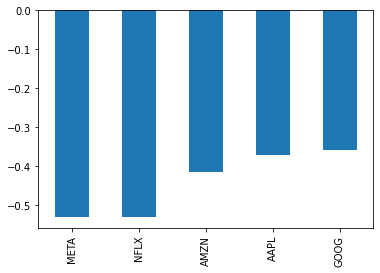

In [7]:
# Similar stocks will be driven by similar factors. 
# PCA makes it easy to visualize this.

factor_exposures = pd.DataFrame(
    index=["f1", "f2", "f3"], 
    columns=portfolio_returns.columns,
    data = pca_components
).T

factor_exposures.f1.sort_values().plot.bar();

# Save the figure.
plt.savefig("./Images/FAANGStocksFactorExposures.jpg")

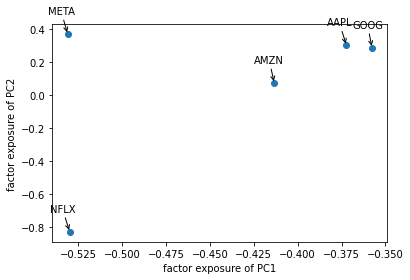

In [8]:
# Another great way to visualize this is with a scatter plot.

labels = factor_exposures.index
data = factor_exposures.values
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), 
        xytext=(-20, 20),
        textcoords='offset points',
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
# Save the figure.
plt.savefig("./Images/FAANGStocksScatterPlot.jpg")